<h1 style="text-align:center;color:blue">Melbourne House Price Prediction </h1>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset and prepare data for training

In [2]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


**Checking for null values**

In [5]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [6]:
df = df.dropna(subset=["Price"])
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [7]:
df.shape

(48433, 13)

In [8]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


**Convert to datetime feature and get only year**

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [10]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Year
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,2017
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,2017


**Remove some columns**

In [11]:
del_col = ['Address', 'Method', 'SellerG', 'Date', 'Regionname', 'Propertycount', 'CouncilArea' ]
df.drop(del_col, axis=1, inplace=True)
df.head()

,Suburb,Rooms,Type,Price,Postcode,Distance,Year
0,Abbotsford,3,h,1490000.0,3067,3.0,2017
1,Abbotsford,3,h,1220000.0,3067,3.0,2017
2,Abbotsford,3,h,1420000.0,3067,3.0,2017
3,Aberfeldie,3,h,1515000.0,3040,7.5,2017
4,Airport West,2,h,670000.0,3042,10.4,2017


**data visualization**

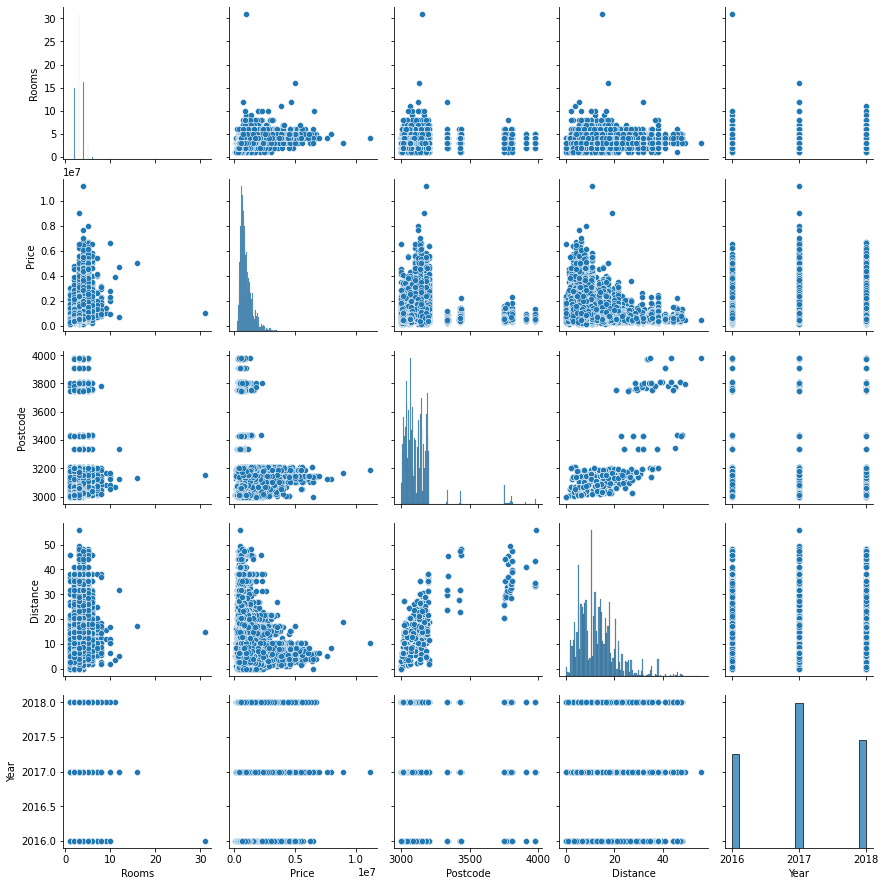

In [12]:
sns.pairplot(df)
plt.show()

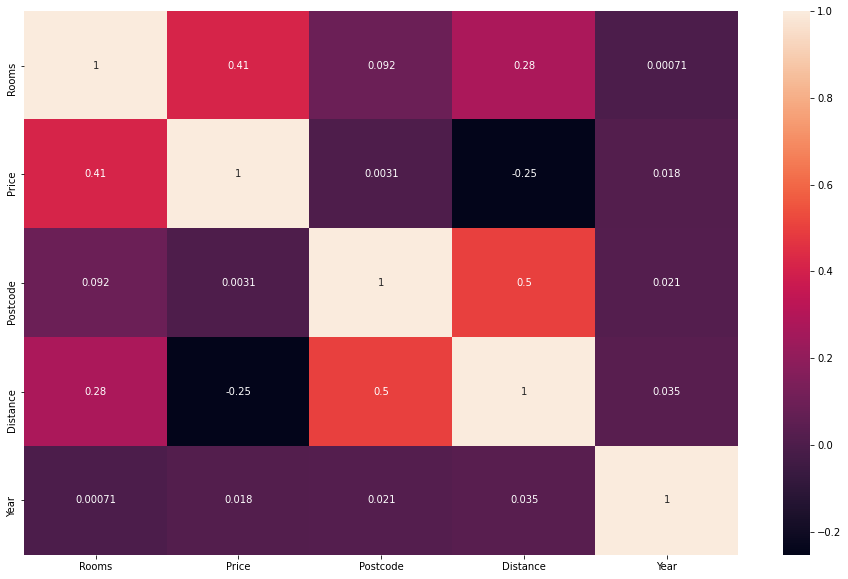

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True);

**Removing Outliers**

In [14]:
print(df.shape)

cols = ['Rooms', 'Price', 'Distance']

for col in cols:
    mean = df[col].mean()
    cut_off = df[col].std() * 3
    high = mean + cut_off
    low = mean - cut_off
    df = df[(df[col]<high) & (df[col]>low)]

print(df.shape)

(48433, 7)
(46532, 7)


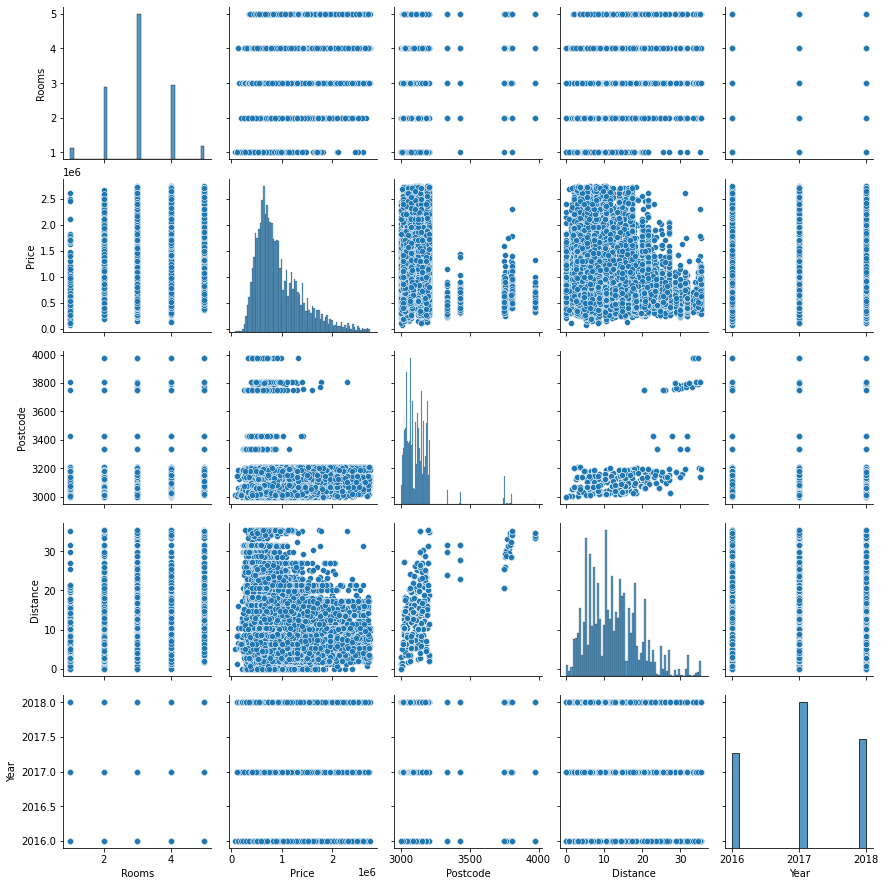

In [15]:
sns.pairplot(df);

**Encoding**

In [16]:
df.head()

,Suburb,Rooms,Type,Price,Postcode,Distance,Year
0,Abbotsford,3,h,1490000.0,3067,3.0,2017
1,Abbotsford,3,h,1220000.0,3067,3.0,2017
2,Abbotsford,3,h,1420000.0,3067,3.0,2017
3,Aberfeldie,3,h,1515000.0,3040,7.5,2017
4,Airport West,2,h,670000.0,3042,10.4,2017


**Any location having less than 400 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount.** 

In [17]:
subrub_stats = df.Suburb.value_counts()
subrub_stats[:20]

Reservoir         1067
Bentleigh East     692
Richmond           633
Craigieburn        594
Preston            592
Mount Waverley     544
Brunswick          540
Cheltenham         493
Northcote          489
Glenroy            481
Essendon           478
Glen Waverley      468
Coburg             460
Mill Park          454
Pascoe Vale        433
Bundoora           426
South Yarra        420
Epping             418
St Kilda           403
Thornbury          394
Name: Suburb, dtype: int64

In [18]:
len(df.Suburb.unique())

344

In [19]:
subrub_stats.values.sum()

46532

In [20]:
len(subrub_stats[subrub_stats>430])

15

In [21]:
len(subrub_stats[subrub_stats<430])

329

In [22]:
locations_15 = subrub_stats[subrub_stats>430]

In [23]:
df.Suburb = df.Suburb.apply(lambda x: x if x in locations_15 else 'other')
df.head()

,Suburb,Rooms,Type,Price,Postcode,Distance,Year
0,other,3,h,1490000.0,3067,3.0,2017
1,other,3,h,1220000.0,3067,3.0,2017
2,other,3,h,1420000.0,3067,3.0,2017
3,other,3,h,1515000.0,3040,7.5,2017
4,other,2,h,670000.0,3042,10.4,2017


In [24]:
df.Suburb.value_counts()

other             38114
Reservoir          1067
Bentleigh East      692
Richmond            633
Craigieburn         594
Preston             592
Mount Waverley      544
Brunswick           540
Cheltenham          493
Northcote           489
Glenroy             481
Essendon            478
Glen Waverley       468
Coburg              460
Mill Park           454
Pascoe Vale         433
Name: Suburb, dtype: int64

In [25]:
df.Year.value_counts()

2017    19384
2018    14534
2016    12614
Name: Year, dtype: int64

In [26]:
df.Type.value_counts()

h    32345
u     9234
t     4953
Name: Type, dtype: int64

In [27]:
df.replace({'h':0,'u':1,'t':2}, inplace=True)
df.replace({2016:0,2017:1,2018:2}, inplace=True)
df.replace({'Reservoir':0,'Bentleigh East':1,'Richmond':2,'Craigieburn':3,'Preston':4,'Mount Waverley':5,'Brunswick':6,'Cheltenham':7,'Northcote':8,'Glenroy':9,'Essendon':10,'Glen Waverley':11,'Coburg':12,'Mill Park':13,'Pascoe Vale':14,'other':15}, inplace=True)
df.head()

,Suburb,Rooms,Type,Price,Postcode,Distance,Year
0,15,3,0,1490000.0,3067,3.0,1
1,15,3,0,1220000.0,3067,3.0,1
2,15,3,0,1420000.0,3067,3.0,1
3,15,3,0,1515000.0,3040,7.5,1
4,15,2,0,670000.0,3042,10.4,1


**Split the dataset to train and test**

In [28]:
X = df.drop('Price', axis=1)
y = df.Price

In [29]:
X.shape

(46532, 6)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, y_test.shape

((32572, 6), (13960,))

## Train the Model

In [31]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_test, y_test)}
    return pd.DataFrame(scores.values(), index=scores.keys())

In [33]:
show_scores(model)

,0
Training MAE,146090.698744
Valid MAE,154665.973413
Training RMSLE,0.197114
Valid RMSLE,0.210902
Training R^2,0.785957
Valid R^2,0.757462


In [34]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [35]:
model2.score(X_train, y_train)

0.3961112667000226

**Parameters Tunning**

In [36]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 5),
           "max_depth": [5, 10],
           "gamma":[0,1],
           "learning_rate":[0.1,0.3,0.4]}

rs_model = RandomizedSearchCV(XGBRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 4min 4s, sys: 4.17 s, total: 4min 8s
Wall time: 1min 29s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=20,
                   param_distributions={'gamma': [0, 1],
                                        'learning_rate': [0.1, 0.3, 0.4],
                                        'max_depth': [5, 10],
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   verbose=True)

In [37]:
rs_model.best_params_

{'n_estimators': 85, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 1}

In [38]:
show_scores(rs_model)

,0
Training MAE,149825.631535
Valid MAE,154093.053116
Training RMSLE,0.202234
Valid RMSLE,0.210163
Training R^2,0.775800
Valid R^2,0.760851


In [39]:
model1 = XGBRegressor(n_estimators=80,
                      max_depth=5,
                      gamma=0,
                      learning_rate=0.3)
model1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
show_scores(model1)

,0
Training MAE,150041.308639
Valid MAE,154123.286207
Training RMSLE,0.202525
Valid RMSLE,0.210205
Training R^2,0.775310
Valid R^2,0.760853


## Save the model using joblib

In [41]:
import joblib
joblib.dump(model,'housepriceprediction.joblib')

['housepriceprediction.joblib']

In [46]:
m = joblib.load('housepriceprediction.joblib')

In [66]:
m.predict(pd.DataFrame([['15', '4', '0', '3150', '4', '2017']], columns=['Suburb' , 'Rooms', 'Type', 'Postcode', 'Distance', 'Year'],
                      dtype=float))

array([2192820.], dtype=float32)